### Let's install the required libraries

In [1]:
!pip install wordcloud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
import nltk
from nltk.corpus import stopwords
from PIL import Image
import csv
import stanza

### We use the Stanza library for lemmatization. Lemmatization is the process of reducing a word to its base or dictionary form, known as the lemma. The lemma represents the canonical or fundamental form of a word, regardless of its context.

In [2]:
stanza.download('be') # Stanza initialization for Belarusian language
nlp = stanza.Pipeline('be')

2023-07-07 20:49:03 INFO: Downloading default packages for language: be (Belarusian) ...
2023-07-07 20:49:04 INFO: File exists: /Users/sasha/stanza_resources/be/default.zip
2023-07-07 20:49:06 INFO: Finished downloading models and saved to /Users/sasha/stanza_resources.
2023-07-07 20:49:06 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2023-07-07 20:49:08 INFO: Loading these models for language: be (Belarusian):
| Processor | Package |
-----------------------
| tokenize  | hse     |
| pos       | hse     |
| lemma     | hse     |
| depparse  | hse     |

2023-07-07 20:49:08 INFO: Using device: cpu
2023-07-07 20:49:08 INFO: Loading: tokenize
2023-07-07 20:49:08 INFO: Loading: pos
2023-07-07 20:49:08 INFO: Loading: lemma
2023-07-07 20:49:08 INFO: Loading: depparse
2023-07-07 20:49:08 INFO: Done loading processors!


### Now let's load our dataframes and take a look at the first 5 rows.

In [3]:
werszy = pd.read_csv("/Users/sasha/Desktop/mowa/werszy.csv")
werszy= werszy.dropna(subset=[werszy.columns[0]], how='all', inplace=False)
text_werszy = ' '.join(werszy.iloc[:, 0].astype(str))
werszy.head()

,Родная мова;
0,"У марах, у песнях, у снах.;"
1,Мае ў ёй кожнае слова;
2,"Свой колер, і смак, і пах.;"
3,Зліваюцца гукі ў словы;
4,"I ў рэчышча роднай мовы,;"


In [4]:
kupala = pd.read_csv("/Users/sasha/Desktop/mowa/kupala.csv")
kupala = kupala[kupala.iloc[:, 0].str.strip().notna()]
text_kupala = ' '.join(kupala.iloc[:, 0].astype(str))
kupala.head()

,"...А ты, сіраціна, жыві,;"
0,"Як ветрам лісток адарваны, –;"
1,"Ні месца табе на зямлі,;"
2,"Ні радасці з песень жаданай,;"
3,Нясі сваю ношку жыцця;
4,"Між наспаў-курганаў магільных,;"


### This code leverages lemmatization to transform the text in the dataframes into its base forms, allowing for further analysis and processing of the text data. This allows for more accurate analysis and visualization of the underlying themes and patterns in the poetry. 

In [5]:
def analyze_text_werszy(text_werszy):
    doc = nlp(text_werszy)
    analyzed_tokens = []
    for sentence in doc.sentences:
        for word in sentence.words:
            analyzed_tokens.append(word.lemma)
    return ' '.join(analyzed_tokens)
# Apply morphological analysis to our dataframe
werszy['analyzed_text'] = werszy.iloc[:, 0].astype(str).apply(analyze_text_werszy)
text_werszy = ','.join(werszy['analyzed_text'])

In [6]:
def analyze_text_kupala(text_kupala):
    doc = nlp(text_kupala)
    analyzed_tokens = []
    for sentence in doc.sentences:
        for word in sentence.words:
            analyzed_tokens.append(word.lemma)
    return ' '.join(analyzed_tokens)
# Apply morphological analysis to DataFrame
kupala['analyzed_text'] = kupala.iloc[:, 0].astype(str).apply(analyze_text_kupala)
text = ','.join(kupala['analyzed_text'])

### The NLTK library does not have a standard list of stop words for the Belarusian language. I will create my own list of stop words for the Belarusian language, and add it to the list of stop words for the Russian language from NLTK. Some articles, particles and prepositions are the same in both languages. In order not to enter manually, we will partially use the capabilities of the standard list.

In [12]:
stop_list = ['а', 'але', 'ад', 'б', 'бы', 'быў', 'была', 'было', 'былі', 'да', 'дзе', 'для', 'ёсць', 'ж', 'з', 'З', 'І', 'і', 'i',
                     'каб', 'каго', 'калі', 'калi', 'каму', 'кім', 'на', 'свой', 'не','па', 'пра', 'праз', 'то', 'хто', 'слова', 'ці', 'чаму',
                     'чаго', 'чым', 'што', 'Што', 'як', 'Як','які', 'якi', 'жа', 'бо', 'ні', 'сваю', 'ім', 'ён', 'ёй', 'Бо', 'ды', 'яе', 'сваю', 'той', 'іх', 'ўжо', 'пад', 'якая', 'якое', 'якія', 'якiя', 
                     'якога', 'якую', 'якіх', 'мной', 'якiх', 'толькі', 'мовы', 'са','мовай', 'над', 'Мае', 'За', 'новай', 'Новай' 'У', 'у', 'роднай', 'жыло', 'сыкаюць', 'якім', 'якiм', 'якой', 'якому', 'якімі', 'якiмi', 'цябе', 'ты', 'Ты', 'Я', 'мяне', 'мне']
stpwrd = nltk.corpus.stopwords.words('russian')
# entend()function is used to add my belarusian stopwords to standard list 
stpwrd.extend(stop_list)

### Uploading images that will be used as a mask for the word cloud.

In [8]:
kupala_mask = np.array(Image.open("/Users/sasha/Desktop/mowa/kupala.png"))
werszy_mask = np.array(Image.open('/Users/sasha/Desktop/mowa/short_u.jpg'))

### Let's create word clouds using the provided text and the specified options such as stop words, mask, background color, and colormap.

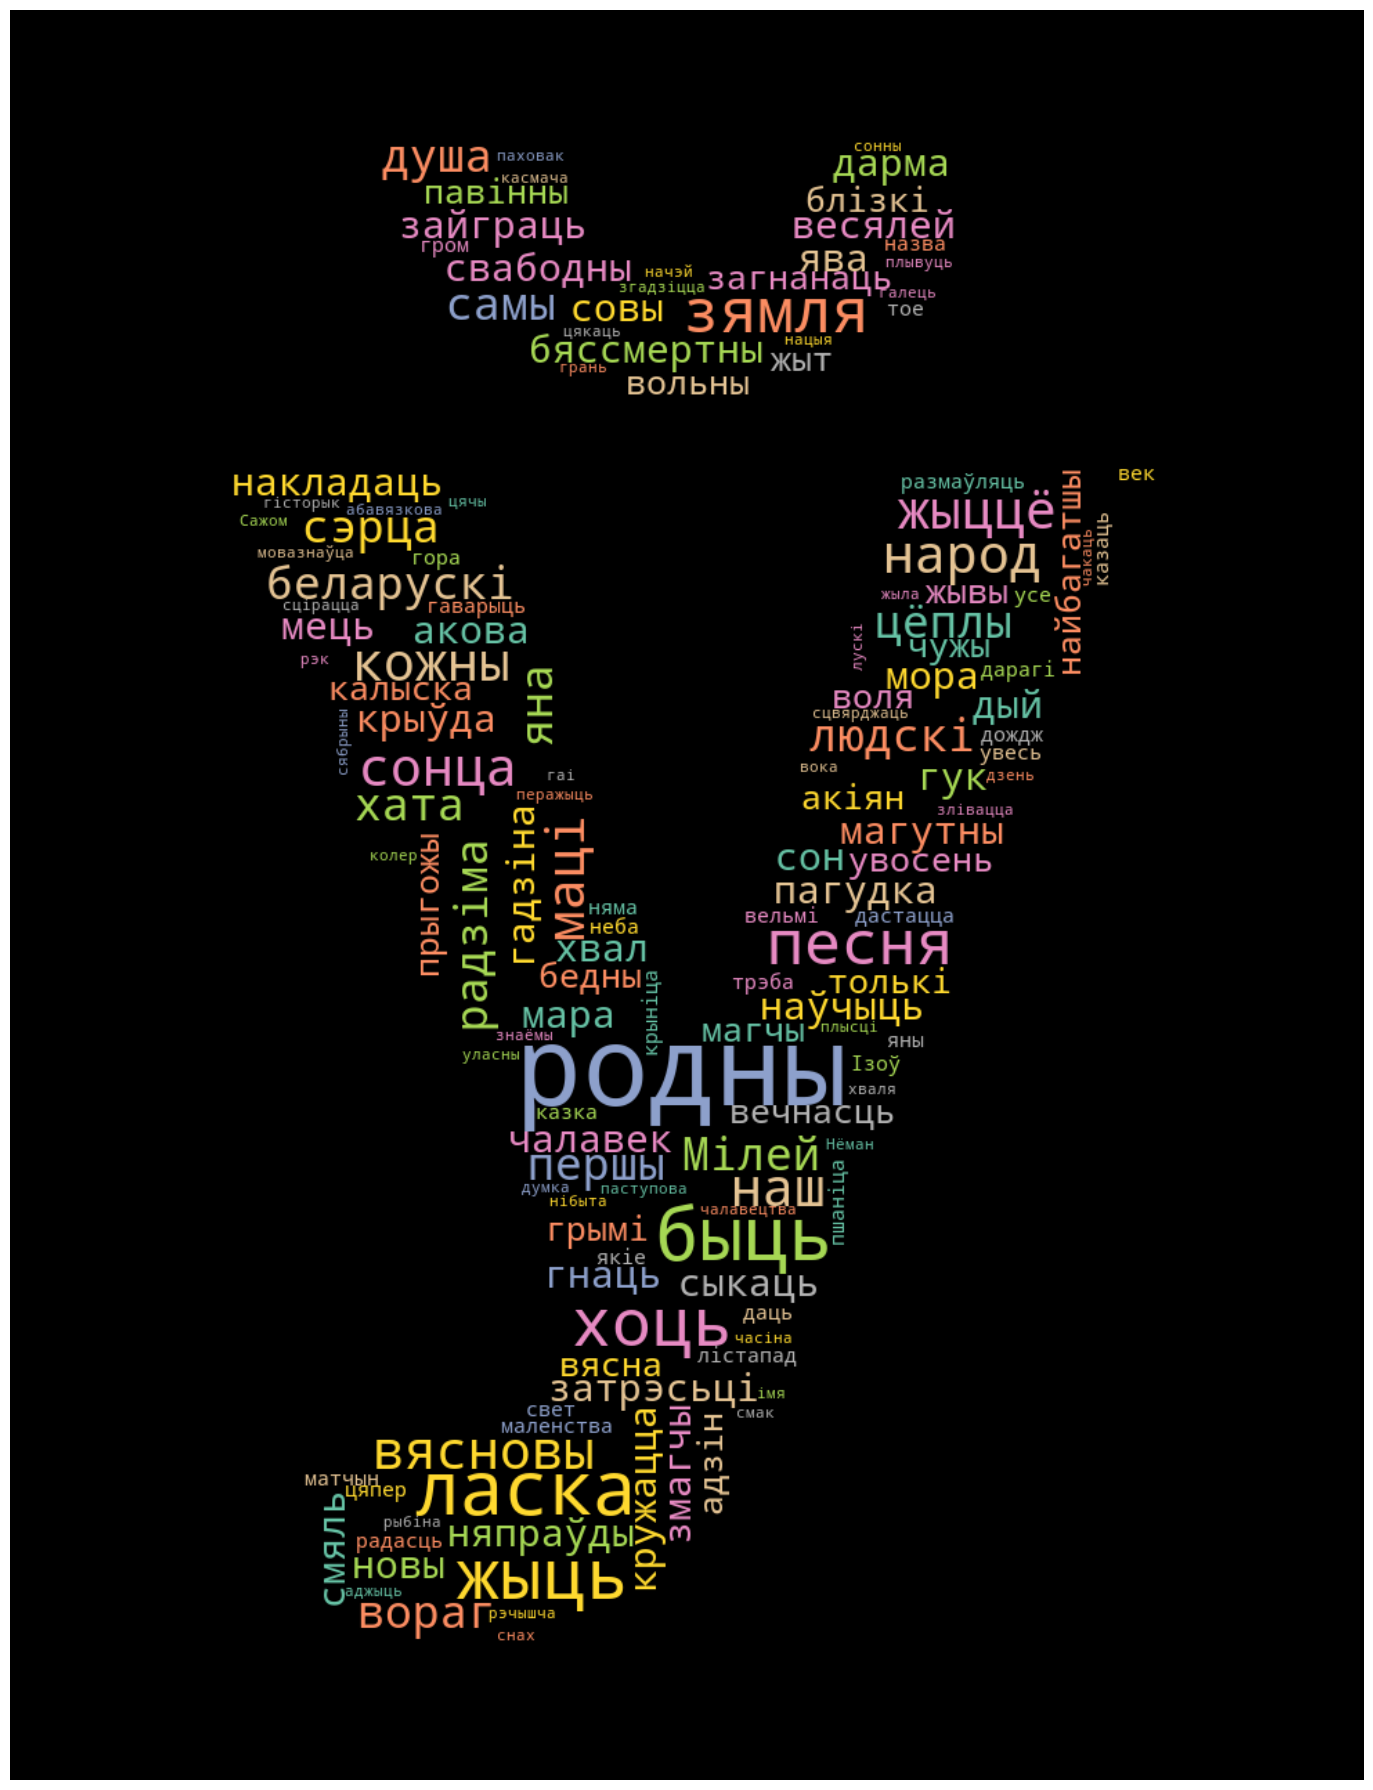

In [9]:
cloud = WordCloud(stopwords = stpwrd, 
                mask=werszy_mask, 
                background_color='#000000', 
                colormap = 'Set2', max_words=150).generate(text_werszy)
# Display the word cloud on the screen
fig = plt.figure(figsize=(14, 18))
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout()

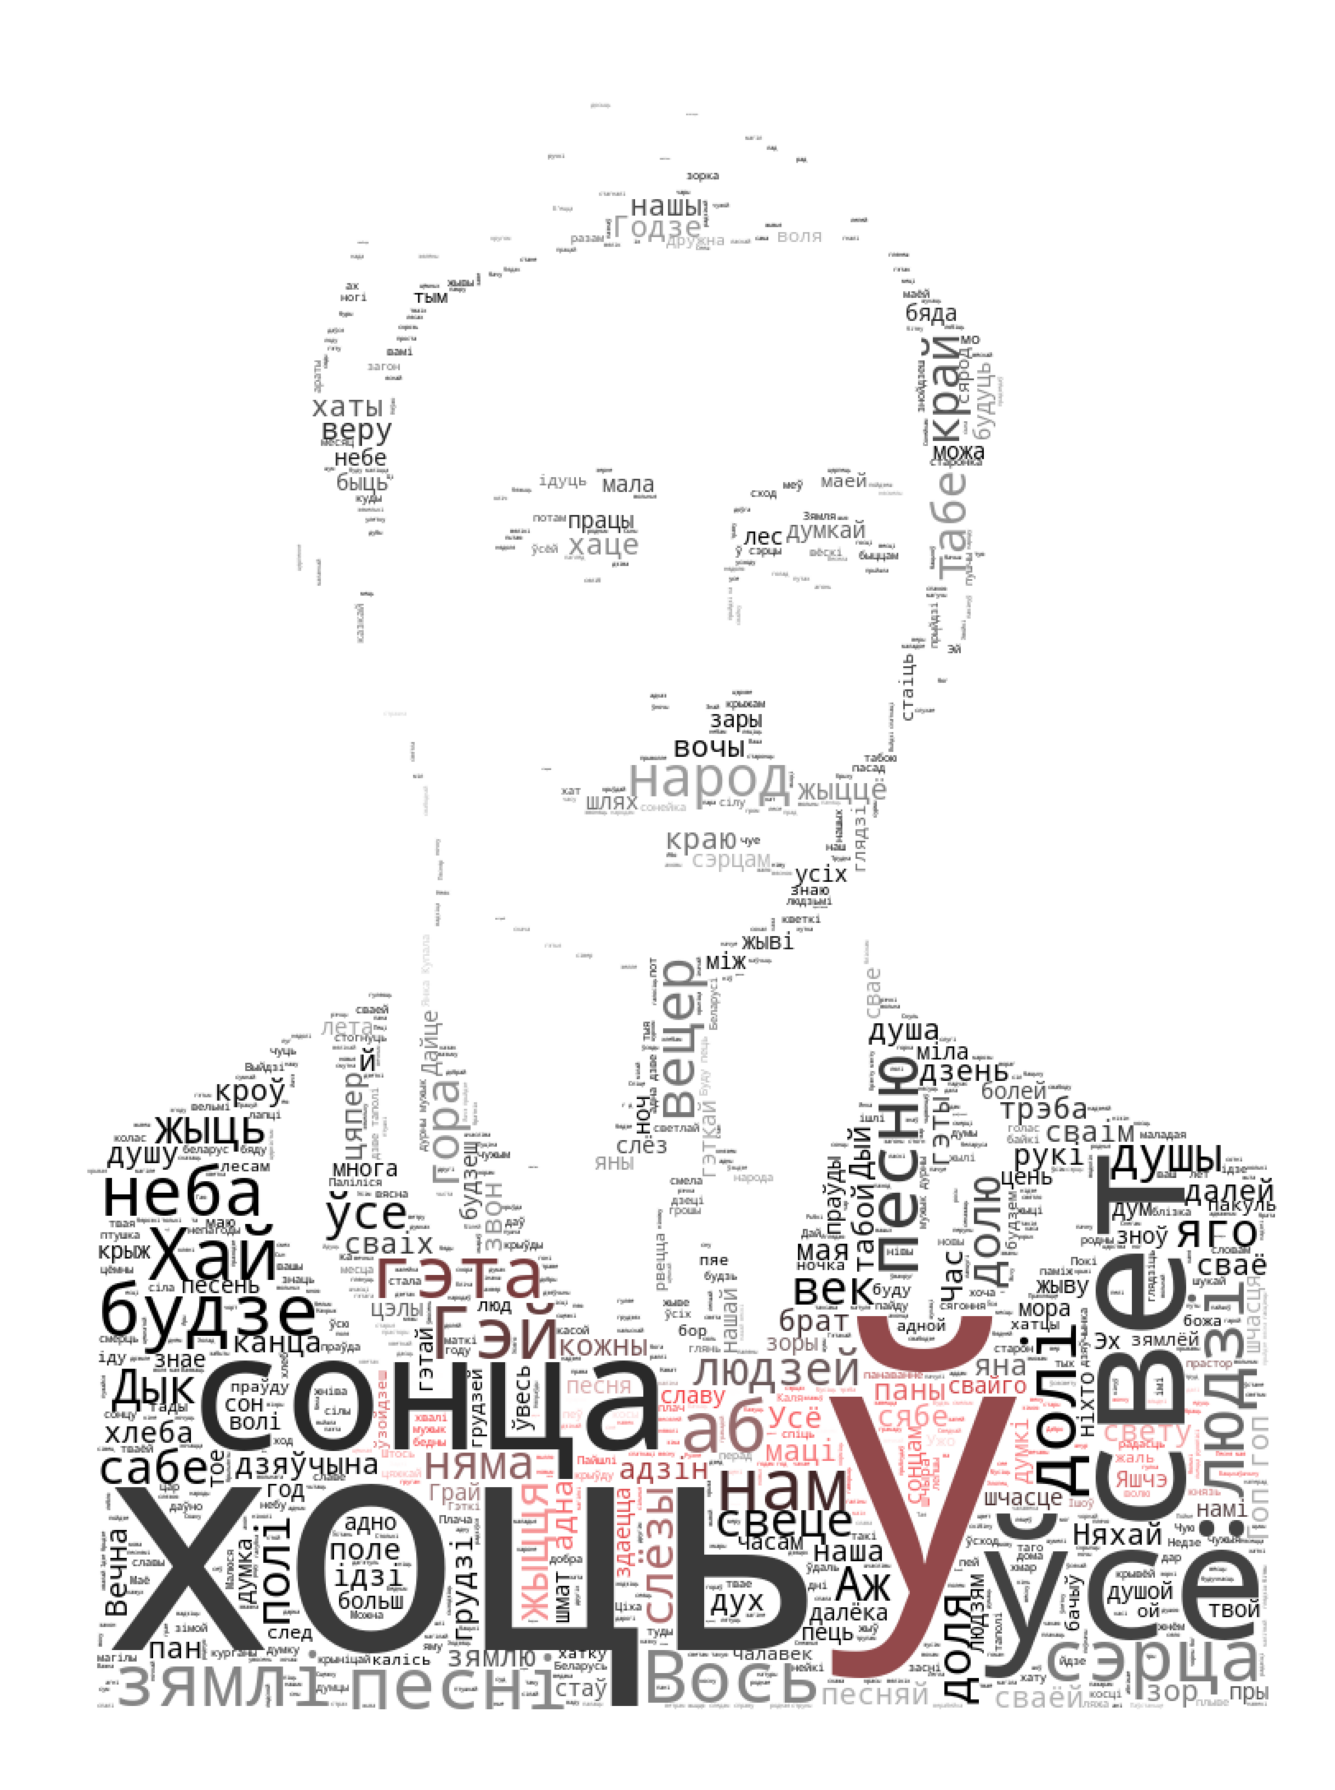

In [13]:
wordcloud_kupala = WordCloud(
                      width = 800,
                      height = 1076,
                      stopwords=stpwrd,
                      background_color = "white",
                      mask = kupala_mask,
                      contour_width = 0,
                      repeat=True,
                      min_font_size = 2,
                      max_words = 1000,
                      ).generate(text_kupala)
fig = plt.figure(figsize=(14, 18))
image_colors = ImageColorGenerator(kupala_mask) #Use to recolor the word cloud based on the image colors defined by image_colors.
wordcloud_kupala.recolor(color_func=image_colors)
# Display the word cloud on the screen
plt.imshow(wordcloud_kupala)
plt.axis("off")
plt.tight_layout()